In [ ]:
words = open('./names.txt', 'r').read().split("\n")
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(x) for x in words)

2

In [ ]:
max(len(x) for x in words)

15

In [ ]:
dick = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1,ch2)
    dick[bigram] = dick.get(bigram, 0) + 1
sorted(dick.items(),key = lambda kv: -kv[1])


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch
counts = torch.zeros((28,28), dtype = torch.int32)


In [ ]:
alphabet = sorted(list(set(''.join(words)))) + ['.']
stoi = {l:i for i,l in enumerate(alphabet)}
itos = {i:l for i,l in enumerate(alphabet)}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '.'}

In [ ]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    counts[lookup[ch1],lookup[ch2]] += 1

print(counts)

tensor([[ 1112,  1082,   940,  2084,  1384,   268,   336,  4664,  3300,   350,
          1136,  5056,  3268, 10876,   126,   164,   120,  6528,  2236,  1374,
           762,  1668,   322,   364,  4100,   870,     0, 13280],
        [  642,    76,     2,   130,  1310,     0,     0,    82,   434,     2,
             0,   206,     0,     8,   210,     0,     0,  1684,    16,     4,
            90,     0,     0,     0,   166,     0,     0,   228],
        [ 1630,     0,    84,     2,  1102,     0,     4,  1328,   542,     6,
           632,   232,     0,     0,   760,     2,    22,   152,    10,    70,
            70,     0,     0,     6,   208,     8,     0,   194],
        [ 2606,     2,     6,   298,  2566,    10,    50,   236,  1348,    18,
             6,   120,    60,    62,   756,     0,     2,   848,    58,     8,
           184,    34,    46,     0,   634,     2,     0,  1032],
        [ 1358,   242,   306,   768,  2542,   164,   250,   304,  1636,   110,
           356,  6496,  1

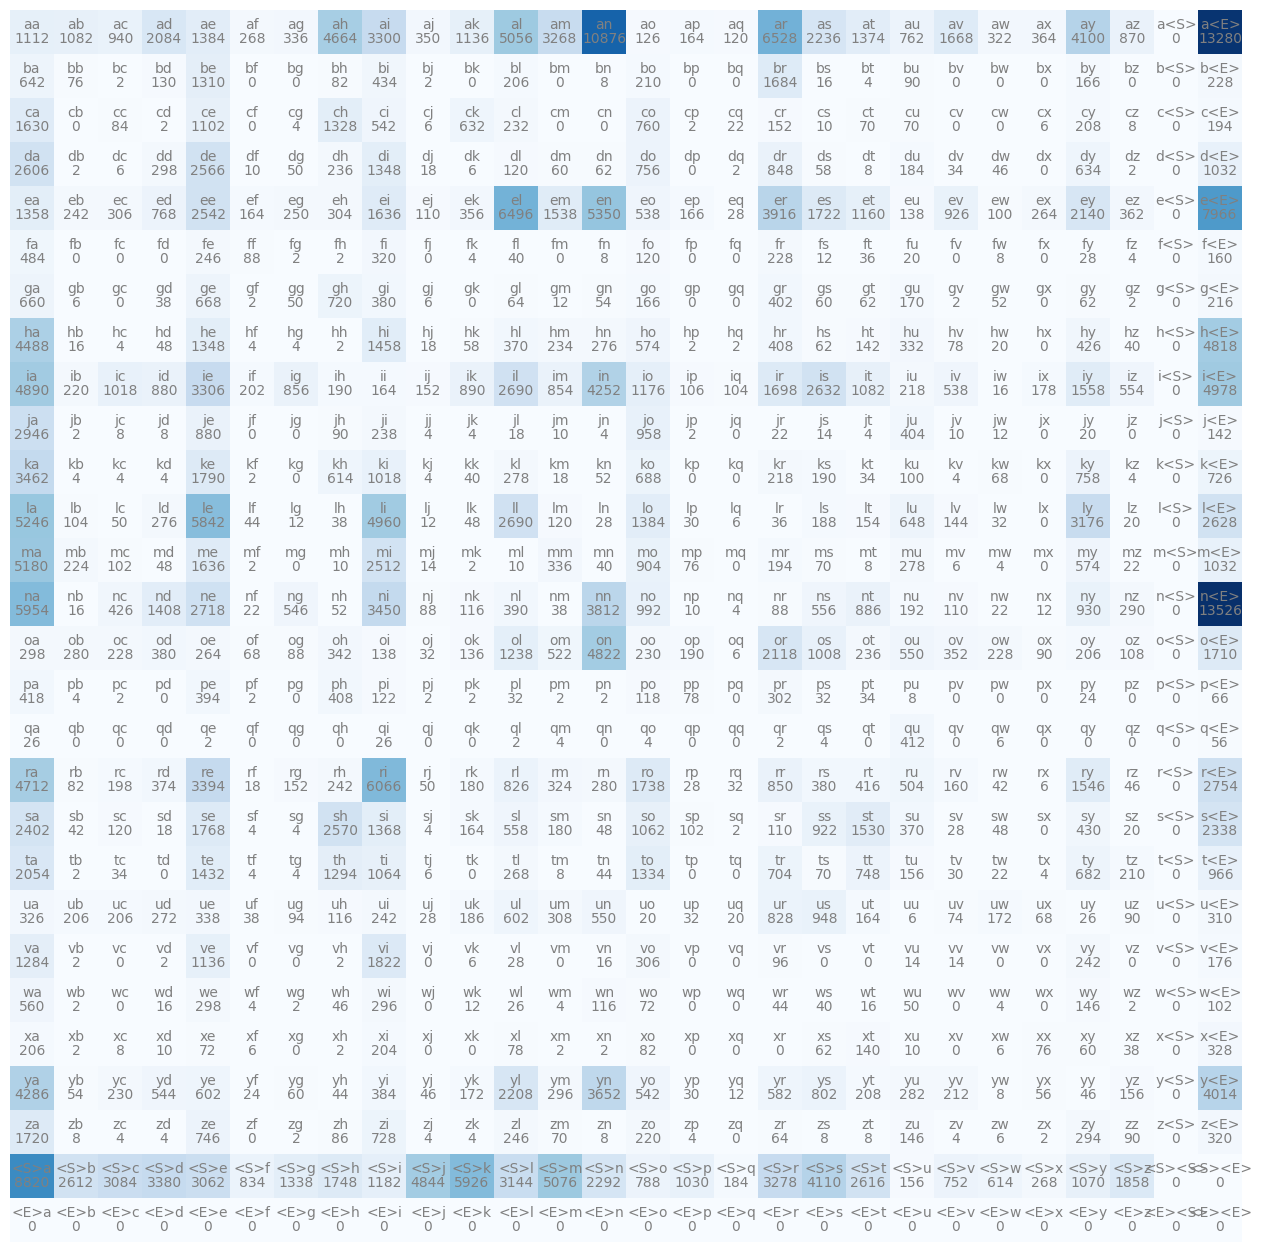

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(counts, cmap='Blues')
for i in range(28):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, counts[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
counts[3,3].item()

149

In [ ]:
import torch

In [ ]:
N = torch.zeros((27,27), dtype = torch.int32)
alphabet = sorted(list(set(''.join(words))))
itos = {i+1:l for i,l in enumerate(alphabet)}
itos[0] = "."
stoi = {l:i+1 for i,l in enumerate(alphabet)}
stoi['.'] = 0

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

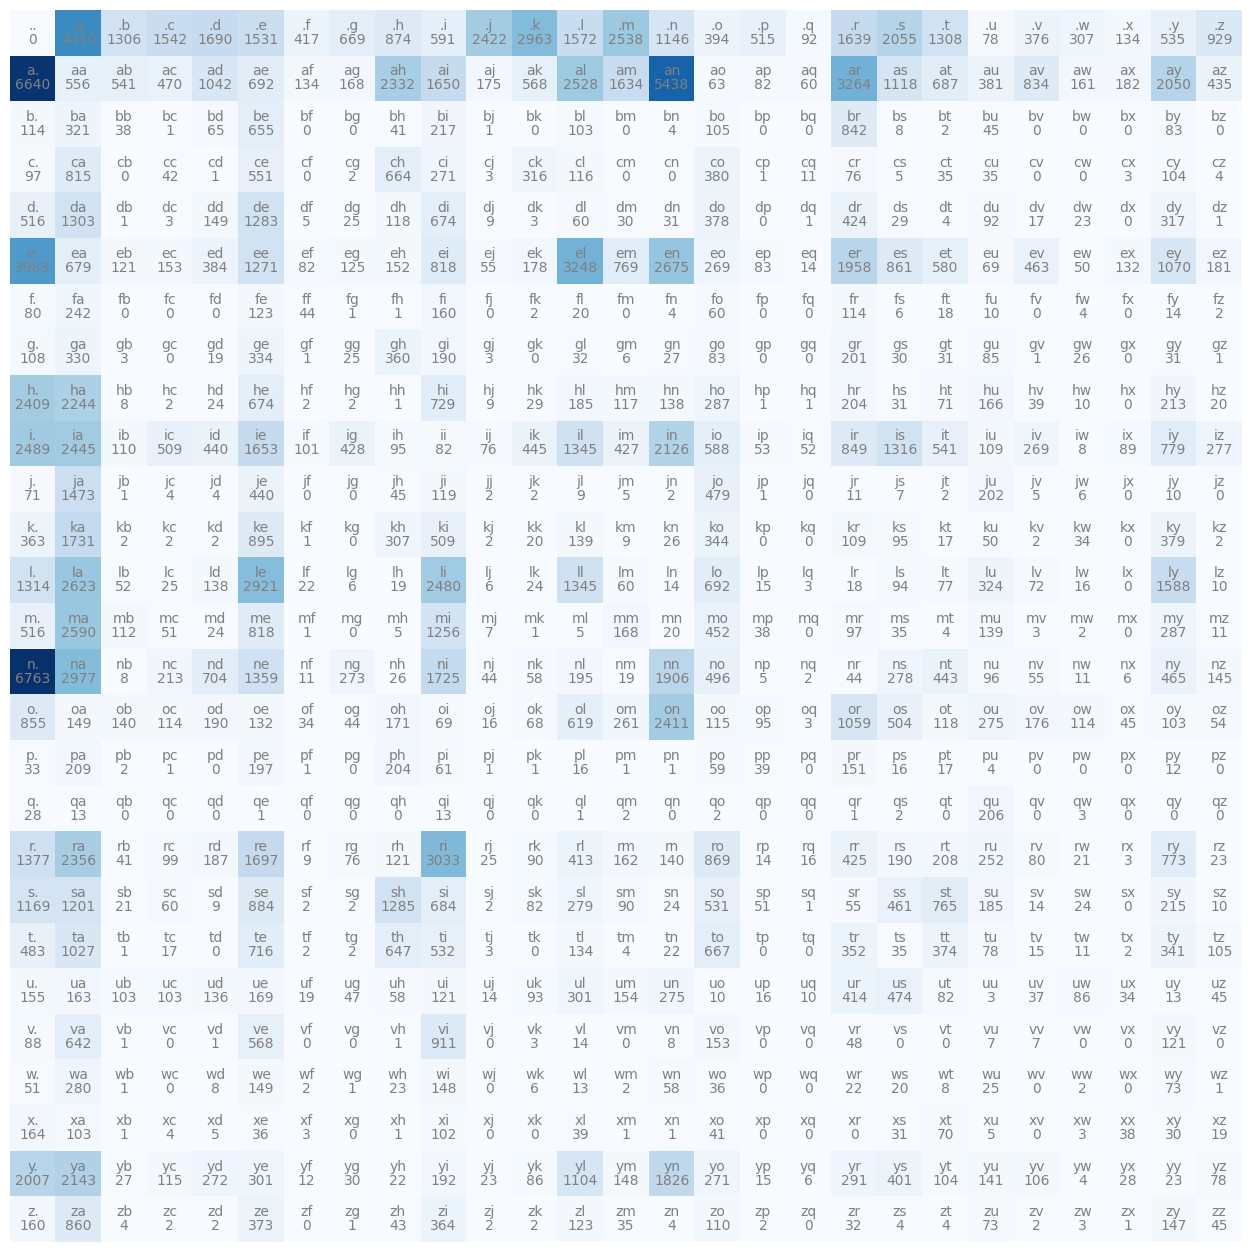

In [ ]:
counts = torch.zeros((27,27), dtype = torch.int32)
for word in words:
  trueword = "." + word + "."
  bigrams = zip(trueword, trueword[1:])
  for ch1, ch2 in bigrams:
    counts[stoi[ch1], stoi[ch2]] += 1

import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(counts, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, counts[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = counts.clone().float()
p = p / p.sum(1, keepdim = True)
p

torch.Size([27, 27])

In [ ]:
for i in range(10):
  ix = None
  word = ""
  P = p[0]
  while ix != 0:
    ix = (torch.multinomial(P, num_samples = 1, replacement = True, generator = g)).item()
    word += itos[ix]
    P = p[ix]
  print(word)

annaryla.
eie.
jein.
jal.
paliaur.
zwuantlynino.
ja.
nesh.
mou.
beera.
